# 📚 Chapter 5.1: Exploring Hugging Face Datasets

Welcome to this comprehensive tutorial on **Hugging Face Datasets**! In this notebook, we'll explore how to discover, download, process, and visualize datasets from the Hugging Face Hub.

## 🎯 Learning Objectives

By the end of this notebook, you will be able to:

1. **Discover Datasets** - Browse and list available datasets on Hugging Face
2. **Validate & Download** - Check dataset availability and download them programmatically
3. **Navigate Dataset Structure** - Understand splits (train, test, validation) and how to access data
4. **Optimize Loading** - Use shuffling, streaming, and Parquet formats for efficient data handling
5. **Tokenize Data** - Prepare text datasets for machine learning models
6. **Visualize Data** - Create insightful visualizations to understand your data

---

## 📦 Installation

Let's start by installing the required libraries.

In [1]:
# Install required packages
# !pip install -q huggingface_hub datasets transformers matplotlib pandas pyarrow

---

## 🔐 Hugging Face Login (Optional)

While most datasets are public and don't require authentication, logging in provides:
- Access to gated datasets
- Better API rate limits
- Ability to save datasets to your account

**To get your token:**
1. Go to [https://huggingface.co/settings/tokens](https://huggingface.co/settings/tokens)
2. Create a new token with `read` access
3. Run the cell below and paste your token

In [3]:
# Optional: Login to Hugging Face Hub
# Uncomment the lines below if you want to authenticate

# from huggingface_hub import notebook_login
# notebook_login()

> 💡 **Note:** If you see a warning about `HF_TOKEN`, don't worry! Public datasets work fine without authentication.

---

## 1️⃣ Discovering Available Datasets

Hugging Face hosts thousands of datasets for various tasks including:
- 📝 Natural Language Processing (NLP)
- 🖼️ Computer Vision
- 🔊 Audio Processing
- 🔀 Multimodal tasks

Let's explore how to programmatically browse these datasets!

### 📋 Listing Datasets

The `list_datasets()` function returns a **generator** that lets us iterate through available datasets without loading everything into memory.

In [4]:
from huggingface_hub import list_datasets

# Get the generator of all datasets
datasets_generator = list_datasets()

# Peek at the first dataset using next()
first_dataset = next(datasets_generator)
print("🔍 First dataset info:")
print(first_dataset)

🔍 First dataset info:
DatasetInfo(id='facebook/research-plan-gen', author='facebook', sha='8ae1ba08759afd32b20eb959ea6addf25c2c0929', created_at=datetime.datetime(2025, 12, 28, 14, 3, 33, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2026, 1, 2, 14, 56, 26, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=1763, downloads_all_time=None, likes=194, paperswithcode_id=None, tags=['size_categories:10K<n<100K', 'format:parquet', 'modality:text', 'library:datasets', 'library:pandas', 'library:polars', 'library:mlcroissant', 'arxiv:2512.23707', 'region:us'], trending_score=193, card_data=None, siblings=None, xet_enabled=None)


In [6]:
import pandas as pd
from IPython.display import display

# Get the generator of all datasets
datasets_generator = list_datasets()

# Peek at the first dataset using next()
first_dataset = next(datasets_generator)

print("🔍 First dataset info:")

# Create a dictionary of key attributes
# We handle potential missing values or lists (like tags) gracefully
info_data = {
    "Attribute": ["ID", "Author", "Downloads", "Likes", "Private", "Created At", "Tags (Preview)"],
    "Value": [
        first_dataset.id,
        first_dataset.author,
        f"{first_dataset.downloads:,}", # Add comma separators
        f"{first_dataset.likes:,}",
        first_dataset.private,
        first_dataset.created_at,
        ", ".join(first_dataset.tags[:4]) + "..." if first_dataset.tags else "None" # Show first 4 tags
    ]
}

# Create a DataFrame
df = pd.DataFrame(info_data)

# Display as a styled table (hiding the index numbers)
display(df.style.hide(axis='index').set_properties(**{'text-align': 'left'}))

🔍 First dataset info:


Attribute,Value
ID,facebook/research-plan-gen
Author,facebook
Downloads,"1,763"
Likes,194
Private,False
Created At,2025-12-28 14:03:33+00:00
Tags (Preview),"size_categories:10K<n<100K, format:parquet, modality:text, library:datasets..."


### 💡 Understanding DatasetInfo

Each dataset is wrapped in a `DatasetInfo` object containing useful metadata:

| Field | Description |
|-------|-------------|
| `id` | Unique identifier (e.g., `author/dataset-name`) |
| `author` | Who created/uploaded the dataset |
| `downloads` | Number of recent downloads |
| `likes` | Community likes |
| `tags` | Task categories, licenses, modalities |
| `created_at` | When the dataset was uploaded |

Let's explore some popular datasets:

In [7]:
# Let's explore a few more datasets
print("📊 Sample of Available Datasets:")
print("=" * 60)

# Reset the generator
datasets_generator = list_datasets()

for i, dataset in enumerate(datasets_generator):
    if i >= 10:  # Only show first 10
        break
    print(f"\n{i+1}. 📁 {dataset.id}")
    print(f"   ⬇️  Downloads: {dataset.downloads:,}")
    print(f"   ❤️  Likes: {dataset.likes:,}")

📊 Sample of Available Datasets:

1. 📁 facebook/research-plan-gen
   ⬇️  Downloads: 1,763
   ❤️  Likes: 194

2. 📁 bigai/TongSIM-Asset
   ⬇️  Downloads: 17,000
   ❤️  Likes: 266

3. 📁 wikimedia/wikipedia
   ⬇️  Downloads: 69,657
   ❤️  Likes: 1,075

4. 📁 llm-jp/jhle
   ⬇️  Downloads: 88
   ❤️  Likes: 70

5. 📁 Anthropic/hh-rlhf
   ⬇️  Downloads: 22,823
   ❤️  Likes: 1,585

6. 📁 gaia-benchmark/GAIA
   ⬇️  Downloads: 15,950
   ❤️  Likes: 580

7. 📁 nebius/SWE-rebench-openhands-trajectories
   ⬇️  Downloads: 510
   ❤️  Likes: 105

8. 📁 bshada/open-schematics
   ⬇️  Downloads: 8,688
   ❤️  Likes: 137

9. 📁 Idavidrein/gpqa
   ⬇️  Downloads: 66,157
   ❤️  Likes: 327

10. 📁 HiDream-ai/ReCo-Data
   ⬇️  Downloads: 7,085
   ❤️  Likes: 81


### 🔎 Searching for Specific Datasets

You can filter datasets by various criteria. Let's search for question-answering datasets:

In [8]:
from huggingface_hub import list_datasets

# Search for datasets with specific criteria
qa_datasets = list_datasets(search="question answering", limit=5)

print("🔍 Question Answering Datasets:")
print("=" * 50)

for dataset in qa_datasets:
    print(f"\n📁 {dataset.id}")
    print(f"   ⬇️  Downloads: {dataset.downloads:,}")

🔍 Question Answering Datasets:

📁 luozhouyang/question-answering-datasets
   ⬇️  Downloads: 39

📁 bigscience-data/roots_indic-bn_bengali_question_answering
   ⬇️  Downloads: 19

📁 AswiN037/tamil-question-answering-dataset
   ⬇️  Downloads: 39

📁 RUCAIBox/Question-Answering
   ⬇️  Downloads: 37

📁 open-source-metrics/visual-question-answering-checkpoint-downloads
   ⬇️  Downloads: 14


---

## 2️⃣ Validating Dataset Availability

Before downloading a large dataset, it's good practice to check if it's available and valid. Hugging Face provides an API for this.

### 🔑 Using the Datasets Server API

In [9]:
import requests

def check_dataset_availability(dataset_id: str) -> dict:
    """
    Check if a dataset is available and what features it supports.
    
    Args:
        dataset_id: The full name of the dataset (e.g., 'ag_news')
    
    Returns:
        Dictionary with availability information
    """
    API_URL = f"https://datasets-server.huggingface.co/is-valid?dataset={dataset_id}"
    
    try:
        response = requests.get(API_URL)
        return response.json()
    except Exception as e:
        return {"error": str(e)}

# Let's check a popular news classification dataset
dataset_to_check = "fancyzhx/ag_news"
availability = check_dataset_availability(dataset_to_check)

print(f"🔍 Checking: {dataset_to_check}")
print("=" * 50)

for feature, status in availability.items():
    icon = "✅" if status else "❌"
    print(f"   {icon} {feature}: {status}")

🔍 Checking: fancyzhx/ag_news
   ✅ preview: True
   ✅ viewer: True
   ✅ search: True
   ✅ filter: True
   ✅ statistics: True


### 📊 Checking Dataset Splits

Most datasets are divided into **splits** for different purposes:
- **train**: For training your model
- **test**: For final evaluation
- **validation**: For hyperparameter tuning (not always present)

Let's see what splits are available:

In [10]:
def get_dataset_splits(dataset_id: str) -> dict:
    """Get the available splits for a dataset."""
    API_URL = f"https://datasets-server.huggingface.co/splits?dataset={dataset_id}"
    
    try:
        response = requests.get(API_URL)
        return response.json()
    except Exception as e:
        return {"error": str(e)}

splits_info = get_dataset_splits("fancyzhx/ag_news")

print("📂 Dataset Splits:")
print("=" * 50)

if "splits" in splits_info:
    for split in splits_info["splits"]:
        print(f"   📁 {split['split']}")

📂 Dataset Splits:
   📁 train
   📁 test


---

## 3️⃣ Downloading Datasets

Now let's download some datasets! We'll use the **AG News** dataset - a collection of news articles categorized into 4 topics:

| Label | Category |
|-------|----------|
| 0 | World |
| 1 | Sports |
| 2 | Business |
| 3 | Science/Technology |

### 📥 Basic Download

In [11]:
from datasets import load_dataset

# Download the AG News dataset
ag_news = load_dataset("fancyzhx/ag_news")

print("📊 AG News Dataset Structure:")
print("=" * 50)
print(ag_news)

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

📊 AG News Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


### 🔍 Exploring the Data

Let's look at some examples from the training set:

In [12]:
# Define category names for better readability
categories = {
    0: "🌍 World",
    1: "⚽ Sports",
    2: "💼 Business",
    3: "🔬 Science/Tech"
}

print("📰 Sample News Articles:")
print("=" * 70)

for i in range(4):
    example = ag_news['train'][i]
    label = example['label']
    text = example['text'][:200] + "..." if len(example['text']) > 200 else example['text']
    
    print(f"\n{categories[label]}")
    print(f"📝 {text}")
    print("-" * 70)

📰 Sample News Articles:

💼 Business
📝 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
----------------------------------------------------------------------

💼 Business
📝 Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense in...
----------------------------------------------------------------------

💼 Business
📝 Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during t...
----------------------------------------------------------------------

💼 Business
📝 Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq af

### 🎯 Downloading Specific Splits

Sometimes you only need one split. This saves time and disk space!

In [13]:
# Download only the test split
ag_news_test = load_dataset("fancyzhx/ag_news", split="test")

print("📊 Test Split Only:")
print("=" * 50)
print(ag_news_test)

# Access data directly without specifying the split key
print(f"\n📰 First test example: {ag_news_test[0]['text'][:100]}...")

📊 Test Split Only:
Dataset({
    features: ['text', 'label'],
    num_rows: 7600
})

📰 First test example: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disap...


---

## 4️⃣ Shuffling Datasets

Shuffling is important for training to prevent the model from learning patterns based on data order.

### 🔀 Reproducible Shuffling

Using a **seed** ensures you get the same shuffle every time - crucial for reproducibility!

In [14]:
# Shuffle with a fixed seed for reproducibility
shuffled_dataset = ag_news.shuffle(seed=42)

print("🔀 Original vs Shuffled (First 5 labels):")
print("=" * 50)

original_labels = [ag_news['train'][i]['label'] for i in range(5)]
shuffled_labels = [shuffled_dataset['train'][i]['label'] for i in range(5)]

print(f"Original:  {[categories[l] for l in original_labels]}")
print(f"Shuffled:  {[categories[l] for l in shuffled_labels]}")

🔀 Original vs Shuffled (First 5 labels):
Original:  ['💼 Business', '💼 Business', '💼 Business', '💼 Business', '💼 Business']
Shuffled:  ['🌍 World', '⚽ Sports', '🌍 World', '🔬 Science/Tech', '🌍 World']


---

## 5️⃣ Streaming Large Datasets

Some datasets are **massive** and won't fit in memory. **Streaming** lets you process data one example at a time without downloading everything first.

### 🌊 Enable Streaming Mode

In [15]:
# Stream instead of downloading
streamed_dataset = load_dataset("fancyzhx/ag_news", streaming=True)

print("📡 Streamed Dataset Structure:")
print("=" * 50)
print(streamed_dataset)
print("\n💡 Notice: It's an IterableDatasetDict, not a regular DatasetDict!")

📡 Streamed Dataset Structure:
IterableDatasetDict({
    train: IterableDataset({
        features: ['text', 'label'],
        num_shards: 1
    })
    test: IterableDataset({
        features: ['text', 'label'],
        num_shards: 1
    })
})

💡 Notice: It's an IterableDatasetDict, not a regular DatasetDict!


In [16]:
# Iterate through streamed data
print("📡 First 3 examples from streamed dataset:")
print("=" * 50)

for i, example in enumerate(streamed_dataset['train']): 
    if i >= 3:
        break
    print(f"\n{i+1}. {categories[example['label']]}")
    print(f"   📝 {example['text'][:80]}...")

📡 First 3 examples from streamed dataset:

1. 💼 Business
   📝 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall ...

2. 💼 Business
   📝 Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment...

3. 💼 Business
   📝 Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices p...


### 📈 When to Use Streaming?

| Scenario | Use Streaming? |
|----------|---------------|
| Dataset > available RAM | ✅ Yes |
| Quick exploration | ✅ Yes |
| Multiple epochs training | ❌ No (download once) |
| Random access needed | ❌ No (streaming is sequential) |

---

## 6️⃣ Working with Parquet Files

**Parquet** is a columnar storage format that's:
- 🚀 Faster for querying specific columns
- 💾 More efficient storage (compression)
- 🔧 Compatible with big data tools (Spark, Hadoop)

### 📁 Getting Parquet URLs

In [17]:
def get_parquet_urls(dataset_id: str) -> dict:
    """Get URLs for Parquet files of a dataset."""
    API_URL = f"https://datasets-server.huggingface.co/parquet?dataset={dataset_id}"
    
    try:
        response = requests.get(API_URL)
        return response.json()
    except Exception as e:
        return {"error": str(e)}

parquet_info = get_parquet_urls("fancyzhx/ag_news")

print("📁 Available Parquet Files:")
print("=" * 60)

if "parquet_files" in parquet_info:
    for pfile in parquet_info["parquet_files"][:3]:  # Show first 3
        size_mb = pfile['size'] / (1024 * 1024)
        print(f"\n📊 Split: {pfile['split']}")
        print(f"   📦 Size: {size_mb:.2f} MB")
        print(f"   🔗 File: {pfile['filename']}")

📁 Available Parquet Files:

📊 Split: test
   📦 Size: 1.18 MB
   🔗 File: 0000.parquet

📊 Split: train
   📦 Size: 17.72 MB
   🔗 File: 0000.parquet


### 📊 Reading Parquet with Pandas

In [18]:
import pandas as pd

# Read directly from the Parquet URL
if "parquet_files" in parquet_info:
    # Get the test split Parquet URL
    test_parquet = next(p for p in parquet_info["parquet_files"] if p['split'] == 'test')
    
    # Read into a DataFrame
    df = pd.read_parquet(test_parquet['url'], engine='pyarrow')
    
    print("📊 Dataset as DataFrame:")
    print("=" * 60)
    
    # Add category names
    df['category'] = df['label'].map({0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'})
    
    display(df.head())
    print(f"\n📈 Shape: {df.shape}")

📊 Dataset as DataFrame:


,text,label,category
0,Fears for T N pension after talks Unions repre...,2,Business
1,The Race is On: Second Private Team Sets Launc...,3,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,Sci/Tech



📈 Shape: (7600, 3)


---

## 7️⃣ Tokenizing Datasets

**Tokenization** is the process of converting text into numerical tokens that models can understand. This is crucial for:

- 🧠 Fine-tuning pre-trained models
- 📊 Text classification
- 🔤 Any NLP task

### 🔤 Understanding Tokenization

In [19]:
from transformers import AutoTokenizer

# Load a tokenizer (using DistilBERT as example)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Example text
sample_text = "Hugging Face makes AI accessible to everyone!"

# Tokenize
tokens = tokenizer(sample_text)

print("🔤 Tokenization Example:")
print("=" * 60)
print(f"\n📝 Original: '{sample_text}'")
print(f"\n🔢 Token IDs: {tokens['input_ids']}")
print(f"\n👁️ Attention Mask: {tokens['attention_mask']}")

# Decode back to see individual tokens
decoded_tokens = [tokenizer.decode([tid]) for tid in tokens['input_ids']]
print(f"\n📊 Decoded Tokens: {decoded_tokens}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

🔤 Tokenization Example:

📝 Original: 'Hugging Face makes AI accessible to everyone!'

🔢 Token IDs: [101, 17662, 2227, 3084, 9932, 7801, 2000, 3071, 999, 102]

👁️ Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

📊 Decoded Tokens: ['[CLS]', 'hugging', 'face', 'makes', 'ai', 'accessible', 'to', 'everyone', '!', '[SEP]']


### 💡 Token Components Explained

| Component | Description |
|-----------|-------------|
| **input_ids** | Numerical IDs for each token in the vocabulary |
| **attention_mask** | 1 = real token, 0 = padding |
| **[CLS]** (ID 101) | Special token marking the start |
| **[SEP]** (ID 102) | Special token marking the end |

### 🔄 Tokenizing the Entire Dataset

In [20]:
# Load a smaller subset for demonstration
small_dataset = load_dataset("fancyzhx/ag_news", split="train[:1000]")

print(f"📊 Small Dataset: {len(small_dataset)} examples")

📊 Small Dataset: 1000 examples


In [21]:
def tokenize_function(examples):
    """
    Tokenize a batch of examples.
    
    Args:
        examples: Batch of examples with 'text' field
    
    Returns:
        Tokenized batch with input_ids, attention_mask, etc.
    """
    return tokenizer(
        examples['text'],
        padding='max_length',      # Pad shorter sequences
        truncation=True,           # Truncate longer sequences
        max_length=128             # Maximum token length
    )

# Apply tokenization to the entire dataset
tokenized_dataset = small_dataset.map(
    tokenize_function,
    batched=True,           # Process in batches for efficiency
    remove_columns=['text'] # Remove original text column
)

print("✅ Tokenized Dataset:")
print("=" * 50)
print(tokenized_dataset)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

✅ Tokenized Dataset:
Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1000
})


In [22]:
# View a tokenized example
example = tokenized_dataset[0]

print("🔍 First Tokenized Example:")
print("=" * 50)
print(f"\n📊 Label: {categories[example['label']]}")
print(f"\n🔢 Input IDs (first 20): {example['input_ids'][:20]}")
print(f"\n👁️ Attention Mask (first 20): {example['attention_mask'][:20]}")

# Decode to see the text
decoded = tokenizer.decode(example['input_ids'], skip_special_tokens=True)
print(f"\n📝 Decoded: {decoded[:100]}...")

🔍 First Tokenized Example:

📊 Label: 💼 Business

🔢 Input IDs (first 20): [101, 2813, 2358, 1012, 6468, 15020, 2067, 2046, 1996, 2304, 1006, 26665, 1007, 26665, 1011, 2460, 1011, 19041, 1010, 2813]

👁️ Attention Mask (first 20): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

📝 Decoded: wall st. bears claw back into the black ( reuters ) reuters - short - sellers, wall street ' s dwind...


---

## 8️⃣ Visualizing Datasets

Data visualization helps us understand:
- 📊 Class distribution (balanced vs imbalanced?)
- 📏 Text length distribution
- 🏷️ Common patterns

Let's create some insightful visualizations!

### 📊 Class Distribution

/tmp/ipykernel_125/4071895046.py:31: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/4071895046.py:31: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/4071895046.py:31: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/4071895046.py:31: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/4071895046.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AF

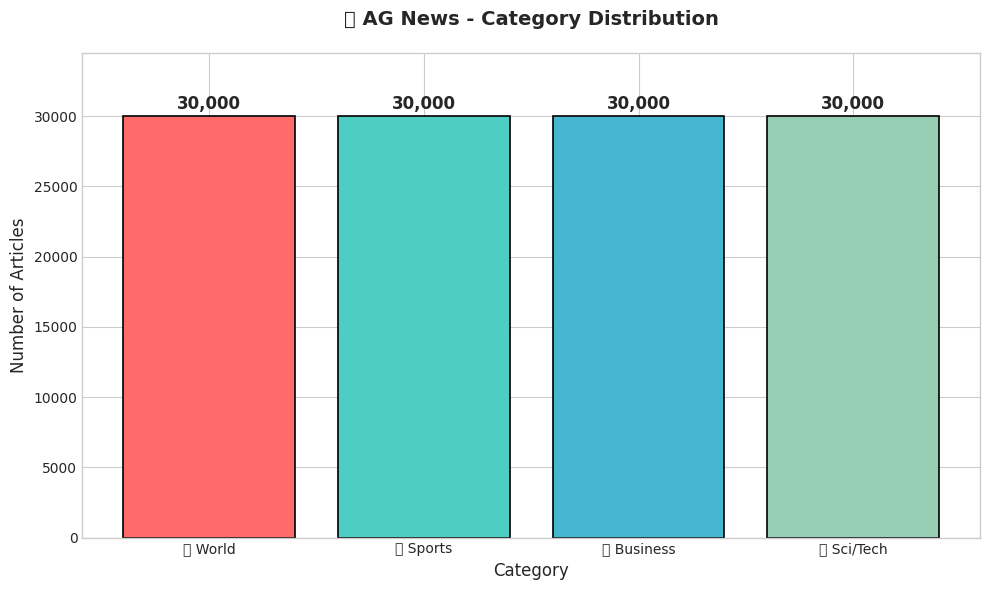


✅ The dataset is perfectly balanced with 30,000 articles per category!


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Set up a nice style
plt.style.use('seaborn-v0_8-whitegrid')

# Count labels in training set
label_counts = Counter(ag_news['train']['label'])

# Prepare data for plotting
category_names = ['🌍 World', '⚽ Sports', '💼 Business', '🔬 Sci/Tech']
counts = [label_counts[i] for i in range(4)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(category_names, counts, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
            f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('📊 AG News - Category Distribution', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Number of Articles', fontsize=12)
ax.set_ylim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

print("\n✅ The dataset is perfectly balanced with 30,000 articles per category!")

### 📏 Text Length Distribution

Understanding text length helps choose appropriate `max_length` for tokenization.

/tmp/ipykernel_125/2352695626.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(length_by_category, labels=['World', 'Sports', 'Business', 'Sci/Tech'],
/tmp/ipykernel_125/2352695626.py:35: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2352695626.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


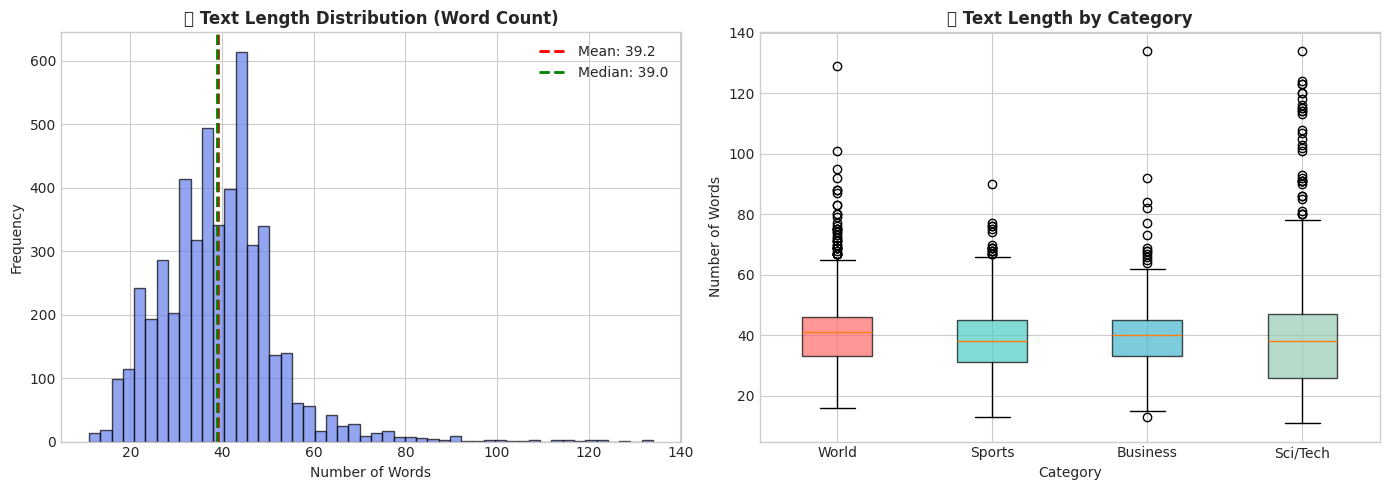

In [24]:
# Calculate text lengths
text_lengths = [len(text.split()) for text in ag_news['train']['text'][:5000]]  # Sample 5000

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(text_lengths, bins=50, color='#667eea', edgecolor='black', alpha=0.7)
ax1.axvline(np.mean(text_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(text_lengths):.1f}')
ax1.axvline(np.median(text_lengths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(text_lengths):.1f}')
ax1.set_title('📏 Text Length Distribution (Word Count)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.legend()

# Box plot by category
ax2 = axes[1]
length_by_category = []
for label in range(4):
    category_texts = [ag_news['train'][i]['text'] for i in range(5000) 
                      if ag_news['train'][i]['label'] == label]
    lengths = [len(t.split()) for t in category_texts[:1000]]
    length_by_category.append(lengths)

bp = ax2.boxplot(length_by_category, labels=['World', 'Sports', 'Business', 'Sci/Tech'],
                  patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('📊 Text Length by Category', fontsize=12, fontweight='bold')
ax2.set_xlabel('Category')
ax2.set_ylabel('Number of Words')

plt.tight_layout()
plt.show()

### 🖼️ Visualizing an Image Dataset

Let's explore **Fashion MNIST** - a dataset of clothing images. This is a great example of how Hugging Face handles image data.

In [25]:
# Load Fashion MNIST dataset
fashion_mnist = load_dataset("zalando-datasets/fashion_mnist")

print("👗 Fashion MNIST Dataset:")
print("=" * 50)
print(fashion_mnist)

README.md: 0.00B [00:00, ?B/s]

fashion_mnist/train-00000-of-00001.parqu(…):   0%|          | 0.00/30.9M [00:00<?, ?B/s]

fashion_mnist/test-00000-of-00001.parque(…):   0%|          | 0.00/5.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

👗 Fashion MNIST Dataset:
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 129509 (\N{COAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 128084 (\N{NECKTIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 128098 (\N{WOMANS BOOTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 128097 (\N{WOMANS SANDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 128087 (\N{DRESS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 128095 (\N{ATHLETIC SHOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/1775328072.py:31: UserWarning: Glyph 128092 (\N{HANDBAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.

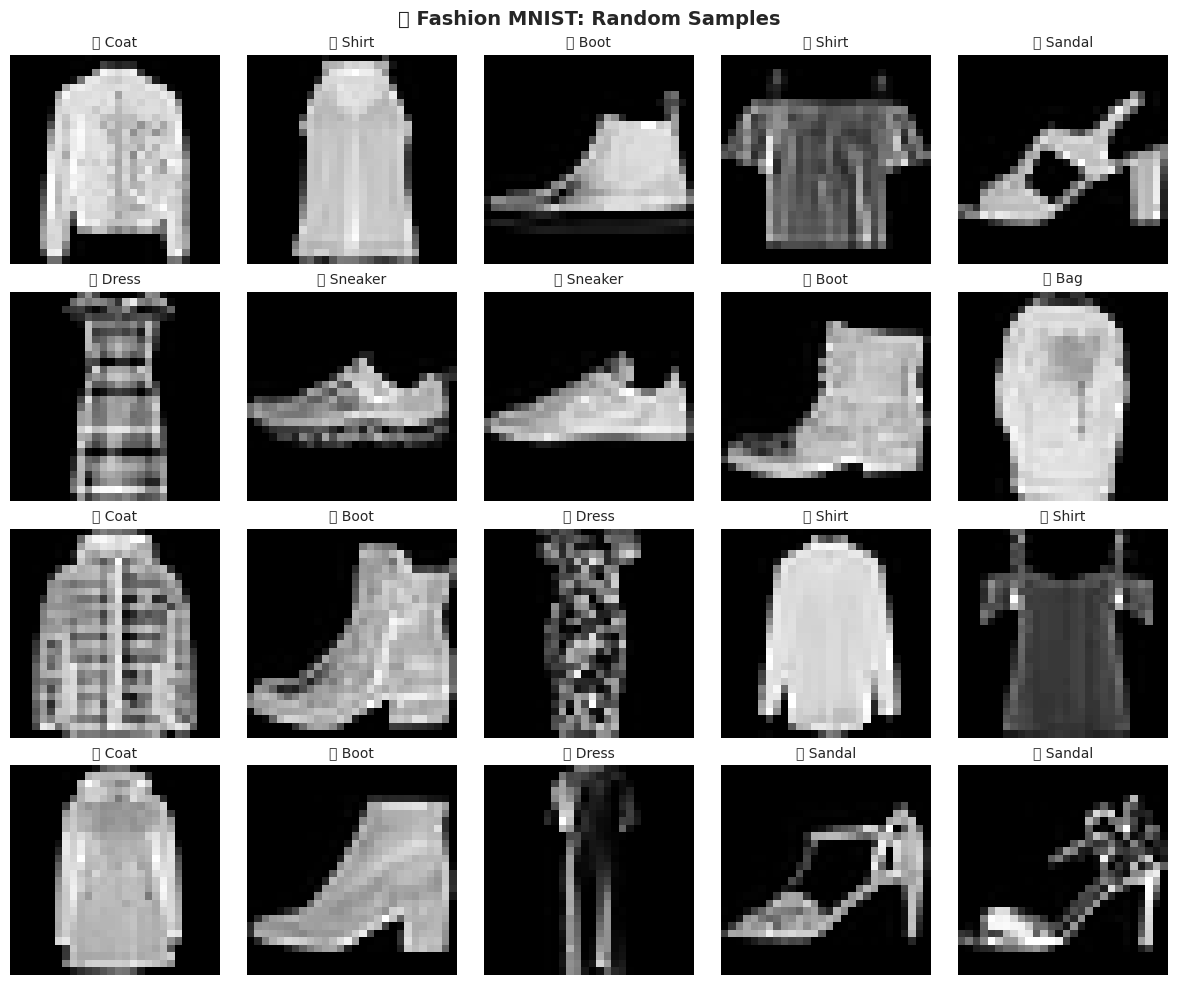

In [26]:
# Define class labels
fashion_labels = {
    0: '👕 T-shirt',
    1: '👖 Trouser',
    2: '🧥 Pullover',
    3: '👗 Dress',
    4: '🧥 Coat',
    5: '👡 Sandal',
    6: '👔 Shirt',
    7: '👟 Sneaker',
    8: '👜 Bag',
    9: '👢 Boot'
}

# Create a 4x5 grid of random samples
fig, axes = plt.subplots(4, 5, figsize=(12, 10))

# Shuffle and select samples
indices = np.random.choice(len(fashion_mnist['train']), 20, replace=False)

for idx, ax in zip(indices, axes.flat):
    sample = fashion_mnist['train'][int(idx)]
    img = sample['image']
    label = sample['label']
    
    ax.imshow(img, cmap='gray')
    ax.set_title(fashion_labels[label], fontsize=10)
    ax.axis('off')

plt.suptitle('👗 Fashion MNIST: Random Samples', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128086 (\N{JEANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 129509 (\N{COAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128087 (\N{DRESS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128097 (\N{WOMANS SANDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128084 (\N{NECKTIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128095 (\N{ATHLETIC SHOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_125/2516051128.py:23: UserWarning: Glyph 128092 (\N{HAND

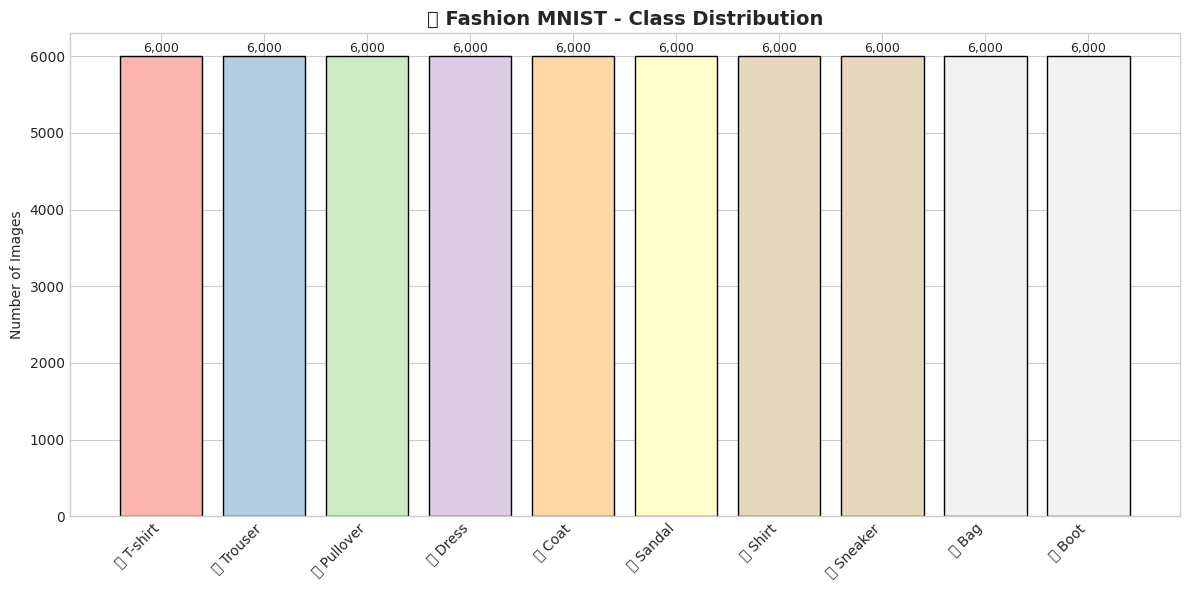

In [27]:
# Class distribution for Fashion MNIST
train_labels = fashion_mnist['train']['label']
label_counts = Counter(train_labels)

fig, ax = plt.subplots(figsize=(12, 6))

categories = [fashion_labels[i] for i in range(10)]
counts = [label_counts[i] for i in range(10)]
colors_fashion = plt.cm.Pastel1(np.linspace(0, 1, 10))

bars = ax.bar(range(10), counts, color=colors_fashion, edgecolor='black')

ax.set_xticks(range(10))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_title('👗 Fashion MNIST - Class Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Images')

# Add count labels
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
            f'{count:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

---

## 🧹 Cleanup (Optional)

Datasets are cached locally. You can clear the cache if needed:

In [28]:
# Show cache location
import os

cache_dir = os.path.expanduser("~/.cache/huggingface/datasets")
print(f"📁 Cache Location: {cache_dir}")

# Uncomment to clear cache (use with caution!)
# from datasets import disable_caching
# import shutil
# shutil.rmtree(cache_dir)

📁 Cache Location: /root/.cache/huggingface/datasets


---

## 📝 Summary

In this notebook, we learned:

| Topic | Key Takeaway |
|-------|-------------|
| **Discovering Datasets** | Use `list_datasets()` to browse, search by criteria |
| **Validation** | Check availability with the Datasets Server API |
| **Downloading** | `load_dataset()` handles everything; use `split=` for specific splits |
| **Shuffling** | Use `shuffle(seed=42)` for reproducible randomization |
| **Streaming** | Enable with `streaming=True` for large datasets |
| **Parquet** | Access columnar format directly via URLs |
| **Tokenization** | Use `map()` with a tokenizer function for batch processing |
| **Visualization** | Essential for understanding data distribution |

---

## 🚀 Next Steps

Now that you know how to work with datasets, you can:

1. **Fine-tune a model** on your tokenized dataset
2. **Create your own dataset** and upload to Hugging Face
3. **Combine multiple datasets** for more robust training
4. **Apply data augmentation** techniques

---

## 📚 Resources

- [Hugging Face Datasets Hub](https://huggingface.co/datasets)
- [Datasets Documentation](https://huggingface.co/docs/datasets)
- [Tokenizers Documentation](https://huggingface.co/docs/tokenizers)

---

*Happy Learning! 🤗*